In this example, you are going to build, train, and check validation error of fully connected/dense neural networks while varying some hyper parameters e.g., number of layers, the number of data points (training and testing), the number of epochs you train.


1.Generate N data points X_data (input) and y_data (output) using following code.

In [34]:
import numpy as np

import math as mt

import matplotlib.pyplot as plt



import random
N=1000
x=np.linspace(-2*mt.pi,2*mt.pi,N)

ya=(np.sin(x))*x**2+2*np.sin(x)

z=np.random.randn(1,N)

y =ya+z

X_data=np.reshape(x,[N,1])

y_data=np.reshape(y,[N,1])


2.Scatter plot data points X_data (input) and y_data (output). You can use following. Observer the relationship between x and y.  


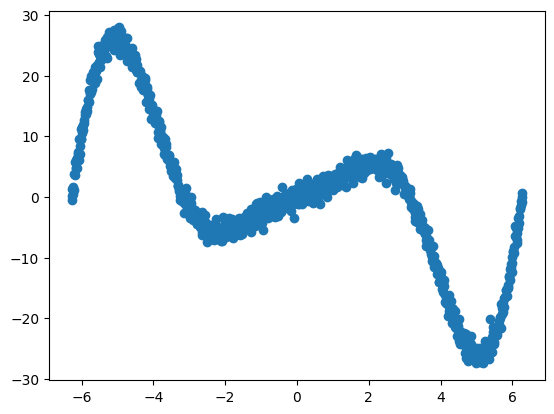

In [35]:
plt.scatter(x,y)


3.You need to  split data into training and validation set. You are going to use train_test_split  from sklearn. Yon need to import as follows, 


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


4.Now you use the following code to make training set with input and output together


In [37]:
#define batch size
BATCH_SIZE=32
import tensorflow as tf

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) # create a dataset from X_train and y_train
train_ds = train_ds.repeat()
train_ds = train_ds.shuffle(buffer_size=len(X_train)) # shuffle the dataset
train_ds = train_ds.batch(BATCH_SIZE) # batch the dataset
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE) # prefetch the dataset to improve performance

# create a dataset from the testing data and make a data pipeline
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)) # create a dataset from X_test and y_test
test_ds = test_ds.repeat() # repeat the dataset
test_ds = test_ds.batch(BATCH_SIZE) # batch the dataset
test_ds = test_ds.prefetch(tf.data.experimental.AUTOTUNE) # prefetch the dataset to improve performance


5.Now you plan to use dense neural network to approximate the relationship between x and y. To do this, you implement a fully connected neural networks that has one input, two hidden layers, (hidden layer one has 32 units/neurons and hidden layer two has 16 units/neurons) and one output layer.  Your code should print your model summary. A sample code is given below.


In [38]:
from keras.models import Sequential
from keras.layers import Dense

mymodel = Sequential()

# input and Hidden layer-1
mymodel.add(Dense(units=32, input_dim=1, kernel_initializer='normal',activation='relu'))
# Hidden layer-2
mymodel.add(Dense(units=16, kernel_initializer='normal', activation='relu'))

# output layer
mymodel.add(Dense(units=1, kernel_initializer='normal'))
print(mymodel.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                64        
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None



6.Once you created your NN, compile and train your implemented dense neural network using following command

In [39]:
# Training our model build above

mymodel.compile(loss='mean_squared_error', optimizer='adam')

hist = mymodel.fit(train_ds, steps_per_epoch=len(X_train)//32, validation_data=test_ds, validation_steps=len(y_test)//32, epochs=100)


Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 175.8165 - val_loss: 162.7551
Epoch 2/100
25/25 [==============================] - 0s 622us/step - loss: 163.8484 - val_loss: 160.9753
Epoch 3/100
25/25 [==============================] - 0s 548us/step - loss: 162.2301 - val_loss: 156.4837
Epoch 4/100
25/25 [==============================] - 0s 538us/step - loss: 145.7881 - val_loss: 147.2421
Epoch 5/100
25/25 [==============================] - 0s 533us/step - loss: 148.4042 - val_loss: 133.2311
Epoch 6/100
25/25 [==============================] - 0s 554us/step - loss: 130.8824 - val_loss: 117.3114
Epoch 7/100
25/25 [==============================] - 0s 572us/step - loss: 116.6010 - val_loss: 105.6851
Epoch 8/100
25/25 [==============================] - 0s 599us/step - loss: 108.8075 - val_loss: 97.4809
Epoch 9/100
25/25 [==============================] - 0s 585us/step - loss: 91.1458 - val_loss: 90.9442
Epoch 10/100
25/25 [==============================] - 0s 635

6.While training of your NN is progressing you can plot training and validation error over various epoch using the following code


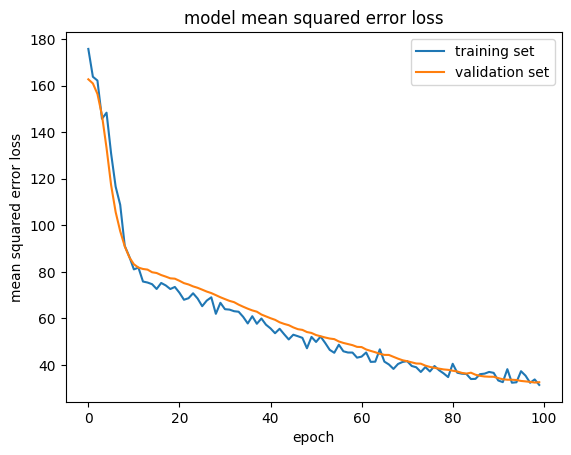

In [40]:
import matplotlib.pyplot as plt

# lets plot the model's history
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()


7.Say you want to have validation loss around 10.00 or less consistently (Note that same network, same data set, and same hyper parameter may give you different validation error due to some randomness if you run multiple times. So you run your code couple of times and check if you are always getting validation loss around 10.00 or less). You will see your above model is not achieving the desired validation loss. You need to fix this issue. As you know there are a number of options. Say you can try following options: 1) the number of data points say up to N=10,000, 2) increasing the complexity of NN by increasing the number of hidden layers say up to 4 (due to the complexity consideration), 3) increase  training by increasing the number of epochs (keep up to 100  due to limited training time). Now you try different options as mentioned above. Then make a comment which option worked to achieve the desired validation loss.  


effect of active function:

    relu vs. sigmoid --- relu is faster

effect of optimization:

    adam vs. sgd ---- sgd's erro is much larger

effect of layers:

    2 hidden layers vs. 3 hidden layers ---- 3 layers' erro is smaller

effect of training epochs:

    epochs = 100 vs. epochs = 200 ---- more training did not help to reduce the loss

effect of batch_size:

    no useful result


8.Now you select the model based on your requirement of validation error. Use your selected trained model  to predict output y_pred corresponding  all the inputs i.e.,  X_data. You can use following command to do so. Then plot the X_test vs y_pred. Check  how good is your trained NN to approximate the relationship between x_data and y.  Hint: compare this plot with the relationship you plotted (scatter plot) in Step 2.  Make a comment whether they look similar or not. 


32/32 [==============================] - 0s 329us/step


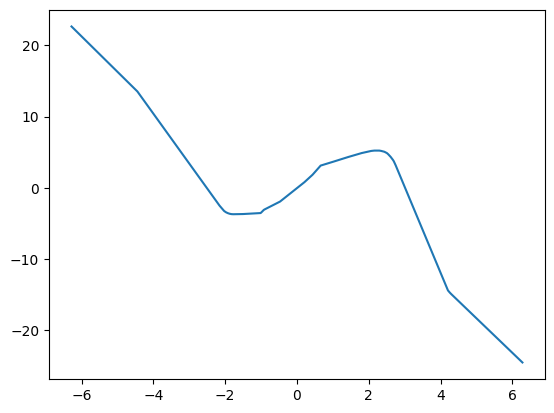

In [41]:
# Predicting output using trained model
y_pred=mymodel.predict(X_data)
plt.plot(X_data,y_pred)
